In [1]:
# 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 함
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [2]:
# 모델 학습 시 불필요한 출력을 끄도록 함 (warning)
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)

In [8]:
# 학습 or 실행 도중 오류가 나서 session이 안닫혔을 경우
# tf.reset_default_graph ()

##### Optimizer의 종류

    1. tf.train.AdadeltaOptimizer
    2. tf.train.AdagradOptimizer
    3. tf.train.AdagradDAOptimizer
    4. tf.train.MomentumOptimizer
    5. tf.train.AdamOptimizer
    6. tf.train.FtrlOptimizer
    7. tf.train.ProximalGradientDescentOptimizer
    8. tf.train.ProximalAdagradOptimizer
    9. tf.train.RMSPropOptimizer
    
    sparse한 데이터는 ada종류 or rmsprop
    adam -> adadelta -> modmentum -> rmsprop -> adagrade

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module6

    -Part 01. CNN 개요 및 구현
    
        02. CNN 기본

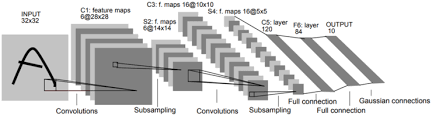

    full connection은 보통 2층만 둠
    full에 오기 전까지는 전처리 과정
    feature를 추출한 후 그 feature가 담긴 벡터를 full connection에서 분류

    sess -> filter(constant) -> conv2d -> eval
    or
    image -> pool

CNN은 feature를 추출하는 과정이 담겨있다. (subsample 만드는 과정이 추가)

    - 데이터를 배열로 만든다.
    - 데이터를 적당히 분할한 후 필터를 입혀서 subsample 생성
    - 샘플들을 또 적당히 분할한 후 필터를 입혀서 subample 생성
    - (Deep) neural network
    - 분류
    
filter(가중치)는 보통 2x2, 3x3을 사용 p.934

    필터와 사진 각 픽셀의 값을 곰한 후 더해준다 -> 점점 이미지가 작아진다.
    분석시 filter에 랜덤값을 부여한 후 학습시킨다
 
Sample (1x2x2x3) -> 사진 한장, 2x2 size, RGB이므로 3

    이미지에서 하나의 셀 값이 하나인 경우 색을 나타내는 값이 하나라는 말이기 때문에 흑백사진일 가능성이 높다.
 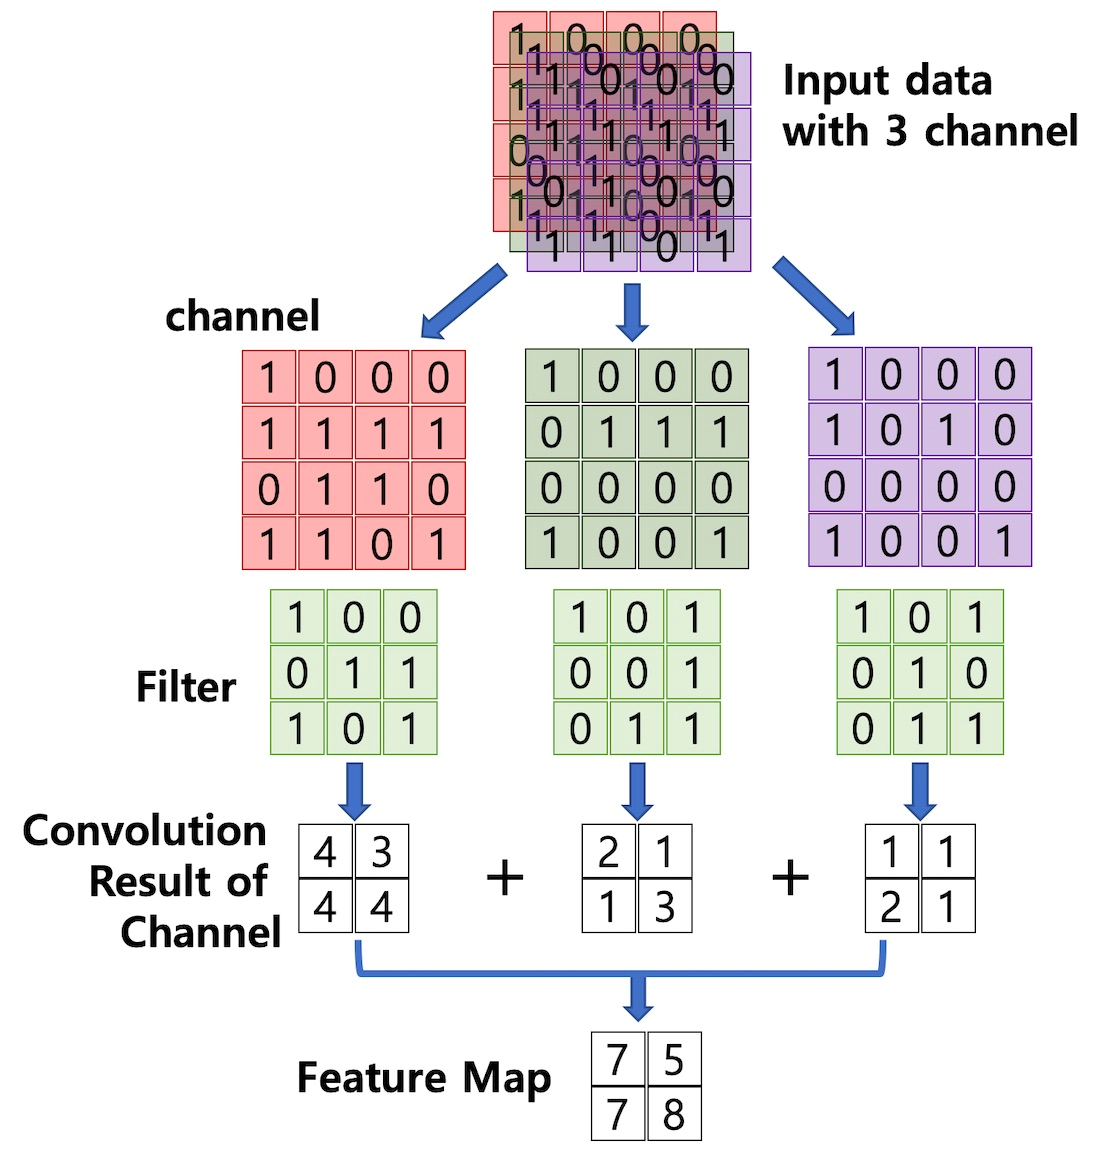
 
stride : step당 건너뛰는 크기 p.940

    사진의 크기가 굉장히 크고 세밀한 작업이 불필요할 때 stride를 크게 지정
    stride 1일 때와 stride 2일 때의 activation map의 size가 달라짐
        (ex) 7x7x1 에 3x3x1 filter, stride:1 이면 5x5x1이 나옴
        (ex) 7x7x1 에 3x3x1 filter, stride:2 이면 3x3x1이 나옴

### Toy code(Convolution Layer)

In [2]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(3, 3, 1)


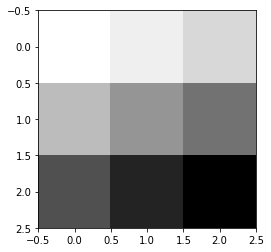

In [3]:
sess = tf.InteractiveSession()
image = np.array([[[1], [2], [3]],
                 [[4], [5], [6]], # (1,3,3,1) 배열임 ( 가운데가 n * n )
                  [[7], [8], [9]]], dtype = np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap = 'Greys') # 숫자가 작을수록 검정색
sess.close()
# session을 닫지 않으면 세션이 이미 열려 있다는 오류가 나서 커널을 restart 해줘야 함

간단한 Graph 만들기(Building the graph)

In [4]:
node_1 = tf.constant(3.0, tf.float32) # 명시적
node_2 = tf.constant(4.0)             # 암묵적
node_3 = tf.add(node_1, node_2)       # node_3 = node_1 + node_2 도 가능

print(node_1)
print(node_2)

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)


Graph 실행하기(Launching the graph in session)

In [6]:
sess = tf.Session()

print(node_3)
print('node_3 : ', sess.run(node_3))

sess.close()

Tensor("Add:0", shape=(), dtype=float32)
node_3 :  7.0


Session을 생성하는 방법

In [7]:
# 1. ft.Session()을 이용
sess = tf.Session()
print(sess.run(node_3))
sess.close()

7.0


In [8]:
# 2. with을 이용
with tf.Session() as sess:
    print(sess.run(node_3))

7.0


In [9]:
# 3. tf.InteractiveSession()을 이용
sess = tf.InteractiveSession()
print(node_3.eval())
sess.close()

7.0


왜 input 형태가 (1,3,3,1) 인가

In [ ]:
# tensorflow 에서 activation map을 만들어주는 함수 conv2d
tf.nn.conv2d(
    input, # input tensor of shape [batch, in_height, in_width, in_channels]
    filter, # filter/kernel shape [filter_heigh, filter_width, in_channels]
            # in_channels : 몇 개의 숫자가 색깔을 나타내는지(1 = 단색, 3 = RGB 등)
    strides, # Must have strides[0] = strides[3] = 1
             # For the most common case of the same horizontal and vertices
             # strides = [1, stride, stride, 1]
             # stride는 값이 4개인 list. 1번째와 4번째는 1로 해주되
             # 두 번째가 skip 하는 가로(horizontal) 셀 수
             # 세 번째가 skip 하는 세로(vertices) 셀 수
    padding, 
    use_cudnn_on_gpu = True, # default
    data_format = 'NHWC',
    dilations = [1,1,1,1],
    name = None)

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


image.shape (1, 3, 3, 1)
filter.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


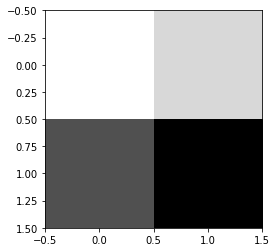

In [11]:
sess = tf.InteractiveSession()

image = image.reshape([1,3,3,1])
print('image.shape', image.shape)
w_filter = tf.constant([[[[1.]],[[1.]]],
                       [[[1.]],[[1.]]]])
print('filter.shape', w_filter.shape)
conv2d = tf.nn.conv2d(input = image, filter = w_filter, strides = [1,1,1,1],
                     padding = 'VALID')
conv2d_img = conv2d.eval()
print('conv2d_img.shape', conv2d_img.shape)
print(conv2d_img.reshape(2,2))
plt.imshow(conv2d_img.reshape(2,2), cmap = 'Greys')

sess.close()

conv2d_img.shape (1, 3, 3, 1)
[[162. 198. 234.]
 [414. 450. 486.]
 [666. 702. 738.]] 

conv2d_img.shape (1, 2, 2, 1)
[[162. 216.]
 [540. 594.]]


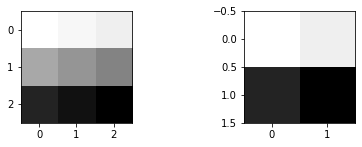

In [24]:
sess = tf.InteractiveSession()

image = np.arange(1, 50, dtype = np.float32).reshape(1,7,7,1)
w_filter = tf.constant(np.full((3,3),2, dtype = np.float32).reshape(3,3,1,1))
conv2d_2 = tf.nn.conv2d(input = image, filter = w_filter, strides = [1,2,2,1],
                     padding = 'VALID')
conv2d_img_2 = conv2d_2.eval()
print('conv2d_img.shape', conv2d_img_2.shape)
print(conv2d_img_2.reshape(3,3),'\n')

conv2d_3 = tf.nn.conv2d(input = image, filter = w_filter, strides = [1,3,3,1],
                     padding = 'VALID')
conv2d_img_3 = conv2d_3.eval()
print('conv2d_img.shape', conv2d_img_3.shape)
print(conv2d_img_3.reshape(2,2))

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(conv2d_img_2.reshape(3,3), cmap = 'Greys')
ax2.imshow(conv2d_img_3.reshape(2,2), cmap = 'Greys')
plt.subplots_adjust(wspace = 1.0)
plt.show()

sess.close()

padding : 이미지의 외각에 지정된 값만큼 특정 값으로 채워넣는 작업

(         이미지의 특징이 줄어드는 것을 막고자 할 떄 사용)

    filter = 3x3x1, stride = 1 을 진행하면 padding을 하기 전과 크기가 같다.
    5x5x1에 패딩을 하면 7x7x1이 되고, filter 진행하면 5x5x1이 나옴
    padding 갯수는 내부적으로 진행 -> padding을 할건지 안할건지만 정함
    
사용 이유 (padding = 'SAME', 'VALID')

    1. weighted sum 을 데이터의 drop 없이 모두 수행할 수 있다.
       (stride가 2 이상일 떄 오른쪽에 남는 줄을 방지)
    2. sample의 크기가 너무 빨리 줄어드는 것을 방지
    3. 경계면의 정보를 살릴 수 있다.
       (아래의 zero padding 처리 된 이미지에서 0으로 둘러싸지 않는다면 1로
       이루어진 데이터에서 어느 곳이 경계 면인지 알기 힘들다.)
       
padding = 'SAME' -> with zero padding p.952

    (참고 : stride=1 일떄는 input과 output(activation map)의 크기 같지만
           stride가 2 이상이면 오른쪽 and 밑에 남는 값이 버려지지 않도록만)
    

In [25]:
sess = tf.InteractiveSession()

image = np.arange(1, 10, dtype = np.float32).reshape(1,3,3,1)
w_filter = tf.constant(np.ones(4, dtype = np.float32).reshape(2,2,1,1))
conv2d_1 = tf.nn.conv2d(input = image, filter = w_filter,
                       strides = [1,1,1,1], padding = 'VALID')
conv2d_2 = tf.nn.conv2d(input = image, filter = w_filter,
                       strides = [1,1,1,1], padding = 'SAME')
print(conv2d_1.eval().reshape(2,2))
print(conv2d_2.eval().reshape(3,3))

sess.close()

[[12. 16.]
 [24. 28.]]
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


In [28]:
sess = tf.InteractiveSession()

image = np.ones(25, dtype = np.float32).reshape(1,5,5,1)
w_filter = tf.constant(np.ones(9, dtype = np.float32).reshape(3,3,1,1))
conv2d_2 = tf.nn.conv2d(input = image, filter = w_filter,
                       strides = [1,1,1,1], padding = 'SAME')
print(conv2d_2.eval().reshape(5,5),'\n')

conv2d_3 = tf.nn.conv2d(input = image, filter = w_filter,
                       strides = [1,1,1,1], padding = 'VALID')
print(conv2d_3.eval().reshape(3,3))

sess.close()

[[4. 6. 6. 6. 4.]
 [6. 9. 9. 9. 6.]
 [6. 9. 9. 9. 6.]
 [6. 9. 9. 9. 6.]
 [4. 6. 6. 6. 4.]] 

[[9. 9. 9.]
 [9. 9. 9.]
 [9. 9. 9.]]


pooling : 데이터의 사이즈를 줄이거나 강조할 때 사용 p.957

     특징맵의 차원을 적극적으로 줄이고 특징들을 뚜렷하게 하려고 사용
     (다운하면 용량이 줄면서 속도 개선 효과)
     (계산량이 적어짐 -> filter에 영향을 줌 (가중치 개선 과정 달라짐)
     
     보통 conv - conv - pooling - conv ... 이런식
     
max pooling : stride의 크기만큼 이동할 때 해당 filter에서 가장 큰 값을 뽑아냄

    - Average(블러링)는 지원하나 min은 지원 x
    - 해상도가 낮다는 것은 데이터가 중간중간 없다는건데 그 주변의 평균값을
      대입해 준다(보간법) -> 블러링 (뚜렷해지는 것은 아니다)
 
 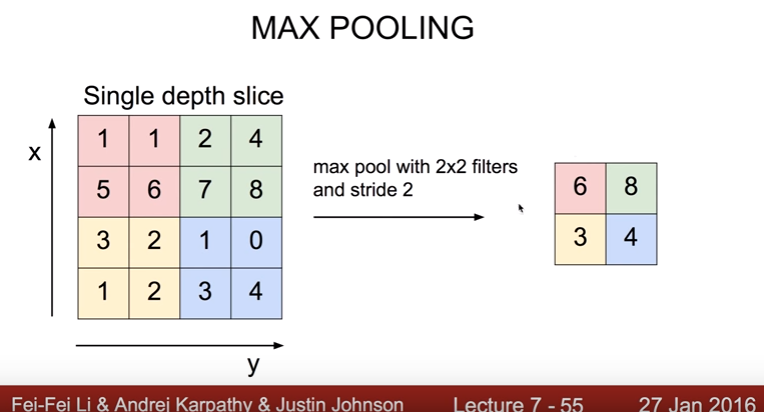

In [ ]:
tf.nn.max_pool(
        value, # max pooling 할 smaple
        ksize, # filter -> A list or tuple of 4 ints
        strides,
        padding,
        data_format = 'NHMC',
        name = None)

In [31]:
sess = tf.InteractiveSession()

image = np.arange(1, 17, dtype = np.float32).reshape(1,4,4,1)
max_pool = tf.nn.max_pool(image, ksize = [1,2,2,1],
                          strides = [1,2,2,1], padding = 'VALID')
avg_pool = tf.nn.avg_pool(image, ksize = [1,2,2,1],
                          strides = [1,2,2,1], padding = 'VALID')

print(max_pool.eval().shape,'\n')
print(max_pool.eval().reshape(2,2),'\n')
print(avg_pool.eval().shape,'\n')
print(avg_pool.eval().reshape(2,2))

sess.close()

(1, 2, 2, 1) 

[[ 6.  8.]
 [14. 16.]] 

(1, 2, 2, 1) 

[[ 3.5  5.5]
 [11.5 13.5]]


In [32]:
# 961
sess = tf.InteractiveSession()

image = np.arange(1, 37, dtype = np.float32).reshape(1,6,6,1)
pool_1 = tf.nn.max_pool(image, ksize = [1,5,5,1],
                          strides = [1,4,4,1], padding = 'VALID')
pool_2 = tf.nn.max_pool(image, ksize = [1,5,5,1],
                          strides = [1,4,4,1], padding = 'SAME')

print(pool_1.eval().shape,'\n')
print(pool_1.eval().reshape(1,1),'\n')
print(pool_2.eval().shape,'\n')
print(pool_2.eval().reshape(2,2))

sess.close()

(1, 1, 1, 1) 

[[29.]] 

(1, 2, 2, 1) 

[[22. 24.]
 [34. 36.]]


### CNN with MNIST p.975

In [34]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


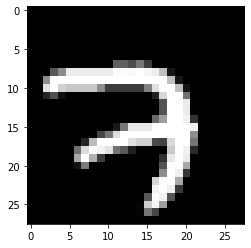

In [37]:
img = mnist.train.images[0].reshape(28,28)
print(mnist.train.labels[0])
plt.imshow(img, cmap = 'gray')

Tensor("Conv2D_36:0", shape=(1, 14, 14, 5), dtype=float32)


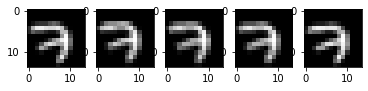

In [49]:
sess = tf.InteractiveSession()

img = img.reshape(1, 28,28,1)
w_filter = np.random.random((3,3,1,5))#-0.5
# 요 차원의 수를 0~1.0사이에서 무작위 생성
# -0.5를 넣으면 -0.5~0.5 값을 생성하며 이제 마이너스 값도 넣겟다는 뜻
conv2d = tf.nn.conv2d(img, w_filter, strides = [1,2,2,1], padding = 'SAME')
print(conv2d)
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3) # 0번과 3번째 축을 바꾸겟다
# filter를 5개 만들었기 때문에 swapaxes구간이 필요함
for i, one_img in enumerate(conv2d_img):
    # enumerate : 반복문 시 인덱스 번호와 값을 튜플형태로 반환
    # collection의 인덱스 번호와 값 반환
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap = 'gray')
    # 1행 5열짜리 subplot 에서 i+1번째. 만약 5행 1열이면 세로로 5개 그려짐
sess.close()

##### filter 종류 p.977

    Fileter : Blur
$$ \begin{bmatrix} 1&1&1 \\1&1&1\\1&1&1 \end{bmatrix} $$

    Filter : Edge-Detect
$$ \begin{bmatrix} 0&-1&0 \\-1&4&-1\\0&-1&0 \end{bmatrix} $$

    Filter : Sharpen
$$ \begin{bmatrix} 0&-1&0 \\-1&5&-1\\0&-1&0 \end{bmatrix} $$

    Filter : Emboss
$$ \begin{bmatrix} -2&-1&0 \\-1&1&1\\0&1&2 \end{bmatrix} $$

$$ K1 = \begin{bmatrix} -1&-1&-1 \\-1&9&-1\\-1&-1&-1 \end{bmatrix} $$

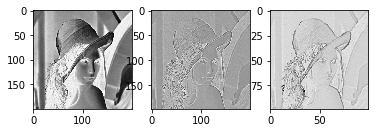

In [54]:
from PIL import Image as Im # pip install Pillow (png파일 읽을 떄 전용함수)
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Lena = Im.open('C:/Users/Affinity/Desktop/study/Module05/lena.jpg') # 이미지열기
Lena.size # 이미지 크리 출력 (40000나옴)
# Lena.show() # 이미지 보기
Lena = Lena.resize((200,200)) # 크기를 200x200 으로
Lena = Lena.convert('L') # 흑백화면으로
Lena = np.array(Lena, dtype = np.float32) # 행렬로
Lena = Lena.reshape(1, 200, 200, 1)
Lena.shape # [1,200,200,1]=[batch, ht, wdth, channel 수]
K1 = tf.constant([[[[-1.]],[[-1.]],[[-1.]]],[[[-1.]],[[9.]],[[-1.]]],[[[-1.]],[[-1.]],[[-1.]]]])
# K1 size = (3,3,1,1) = [ht, wdth, channel, 개수]
a1 = tf.nn.conv2d(Lena, K1, strides = [1,1,1,1], padding = 'VALID')

sess = tf.Session()
a1 = sess.run(a1)
a1.shape # = [1, 9=198, 198, 1] = [channel수, ht, wdth, batch]
a1_img = np.swapaxes(a1, 0, 3)
a1_img.shape # axis 0과 3을 서로 바꾸기 => [1, 198, 198, 1] = [batch,ht,wdth,channel수]

# 최대값 풀링(2)
h1 = tf.nn.max_pool(a1_img, ksize = [1,2,2,1],
                    strides = [1,2,2,1], padding = 'VALID')

h1 = sess.run(h1)
h1.shape # [1, 99, 99, 1]
plt.subplot(1,3,1)
plt.imshow(Lena.reshape(200, 200), cmap = 'Greys')
plt.subplot(1,3,2)
plt.imshow(a1_img.reshape(198,198), cmap = 'Greys')
plt.subplot(1,3,3)
plt.imshow(h1.reshape(99,99), cmap = 'Greys')

중요!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

    swapaxes를 하는 이유
     - image가 h, w, batch(깊이)가 있을 때
       filter를 적용하면 첫번쨰 batchdml h, w부터 순환하는 것이 아니라
       filter크기 만큼의 모든 batch를 한번에 수행
       따라서 0과 3을 swap함
       [이미지갯수,h,w,batch] -> [batch, h,w, 이미지갯수]
       
 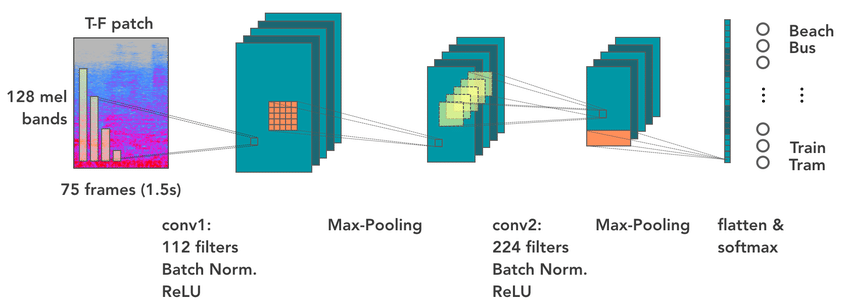

    입력 데이터 높이 : H
    입력 데이터 폭 : W
    필터 높이 : FH
    필터 폭 : FW
    Strid 크기 : S
    패딩 사이즈 : P

$$ Output Height = OH = \frac{H + 2P - FH)}{S} + 1 $$

$$ Output Height = OH = \frac{H + 2P - FH)}{S} + 1 $$

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module6

    -Part 01. CNN 개요 및 구현
    
        03. CNN 기본 2

In [56]:
sess = tf.InteractiveSession()

image = np.arange(1, 10, dtype = np.float32).reshape(1,3,3,1)
w_filter = np.array([1,1,1,1,2,2,2,2,3,3,3,3], dtype = np.float32).reshape(1,3,2,2)
w_filter = np.swapaxes(w_filter, 0, 2)
w_filter = np.swapaxes(w_filter, 1, 3) # (2,2,1,3) 됨
conv2d = tf.nn.conv2d(input = image, filter = w_filter, strides = [1,1,1,1],
                     padding = 'SAME')
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3).reshape(3,3,3)
print('conv2d_img.shape', conv2d_img.shape)
print(conv2d_img)

sess.close()

conv2d_img.shape (3, 3, 3)
[[[12. 16.  9.]
  [24. 28. 15.]
  [15. 17.  9.]]

 [[24. 32. 18.]
  [48. 56. 30.]
  [30. 34. 18.]]

 [[36. 48. 27.]
  [72. 84. 45.]
  [45. 51. 27.]]]


p.982 (윗 ppt 정리해 옮기기)

    conv->ReLU->conv->ReLU->POOL->conv->ReLU->POOL 이런 방식
    
활성화 함수

    Sigmoid, tanh, ReLU, Leaky ReLU, Maxout, ELU
    - 소규모 네트워크에서 ReLU를 잘못 사용할 경우 사용하지 않은 것만 못할 수도
    
dying ReLU p.985
    
    filter를 적용했을 떄 음수가 나오게 되면 ReLU는 0처리 시켜 데이터 지움
    대안 : Leaky ReLU

p. 986

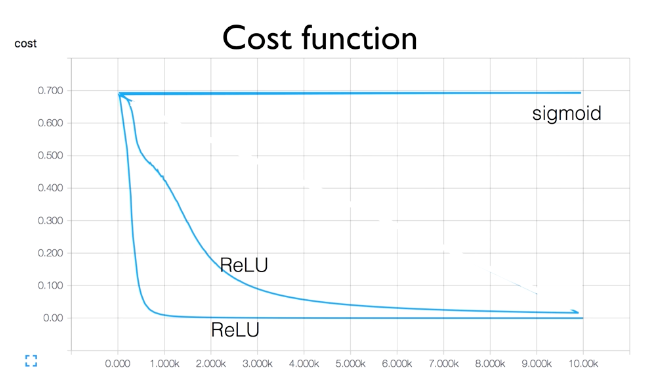

    - 초기 filter의 weight 값에 따라 성능이 많이 갈린다.
    - 후에 앙상블로 이 문제를 해결할 수 있다.

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module6

    -Part 01. CNN 개요 및 구현
    
        04. MNIST with CNN

##### MNIST의 CNN 설계 과정 p.988~ 참고하기

In [4]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
tf.set_random_seed(777)
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

learning_rate = 0.001 # 주로 이정도에서 시작 ( 0.01은 너무 큼 )
training_epochs = 5
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784]) # x_data shape
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10]) # y_data shape
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev = 0.01))
# stddev : normal갑을 정규화하겟다는 뜻
L1 = tf.nn.conv2d(X_img, W1, strides = [1,1,1,1], padding = 'SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev = 0.01))
L2 = tf.nn.conv2d(L1, W2, strides = [1,1,1,1], padding = 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
L2_flat = tf.reshape(L2, [-1,7*7*64])

# Final FC 7x7x64 inputs -> 10outputs
# 이 부분이 full connection
W3 = tf.get_variable("W3", shape = [7*7*64, 10],
                    initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(L2_flat, W3) + b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs, Y:batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict = {
    X:mnist.test.images, Y:mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples -1)
print("label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
tf.argmax(logits, 1), feed_dict = {X:mnist.test.images[r:r + 1]}))

sess.close()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Learning started. It takes sometime.
Epoch: 0001 cost = 0.345664909
Epoch: 0002 cost = 0.091818272
Epoch: 0003 cost = 0.068375455
Epoch: 0004 cost = 0.056351375
Epoch: 0005 cost = 0.046915041
Learning Finished!
Accuracy: 0.9845
label:  [0]
Prediction:  [0]


In [71]:
tf.set_random_seed(777)
tf.reset_default_graph ()
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

learning_rate = 0.0015 # 주로 이정도에서 시작 ( 0.01은 너무 큼 )
training_epochs = 12
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784]) # x_data shape
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10]) # y_data shape
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev = 0.01))
# stddev : normal갑을 정규화하겟다는 뜻
L1 = tf.nn.conv2d(X_img, W1, strides = [1,1,1,1], padding = 'SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev = 0.01))
L2 = tf.nn.conv2d(L1, W2, strides = [1,1,1,1], padding = 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')


W3 = tf.Variable(tf.random_normal([3,3,64,256], stddev = 0.01))
L3 = tf.nn.conv2d(L2, W3, strides = [1,1,1,1], padding = 'SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
L3_flat = tf.reshape(L3, [-1,4*4*256])

# Final FC 7x7x64 inputs -> 10outputs
# 이 부분이 full connection
W4 = tf.get_variable("W4", shape = [4*4*256, 10],
                    initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(L3_flat, W4) + b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y))
optimizer = tf.train.RMSPropOptimizer(learning_rate = learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs, Y:batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict = {
    X:mnist.test.images, Y:mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples -1)
print("label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
tf.argmax(logits, 1), feed_dict = {X:mnist.test.images[r:r + 1]}))

sess.close()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Learning started. It takes sometime.
Epoch: 0001 cost = 0.741188973
Epoch: 0002 cost = 0.057582616
Epoch: 0003 cost = 0.036261594
Epoch: 0004 cost = 0.026054839
Epoch: 0005 cost = 0.019609381
Epoch: 0006 cost = 0.015072492
Epoch: 0007 cost = 0.012120807
Epoch: 0008 cost = 0.009014734
Epoch: 0009 cost = 0.007459560
Epoch: 0010 cost = 0.006574419
Epoch: 0011 cost = 0.005961222
Epoch: 0012 cost = 0.005114655
Learning Finished!
Accuracy: 0.9931
label:  [0]
Prediction:  [0]


In [39]:
tf.set_random_seed(777)
# tf.reset_default_graph ()
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

learning_rate = 0.0015 # 주로 이정도에서 시작 ( 0.01은 너무 큼 )
training_epochs = 5
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784]) # x_data shape
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10]) # y_data shape
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev = 0.01))
# stddev : normal갑을 정규화하겟다는 뜻
L1 = tf.nn.conv2d(X_img, W1, strides = [1,1,1,1], padding = 'SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev = 0.01))
L2 = tf.nn.conv2d(L1, W2, strides = [1,1,1,1], padding = 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')


W3 = tf.Variable(tf.random_normal([3,3,64,256], stddev = 0.01))
L3 = tf.nn.conv2d(L2, W3, strides = [1,1,1,1], padding = 'SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
L3_flat = tf.reshape(L3, [-1,4*4*256])

# Final FC 7x7x64 inputs -> 10outputs
# 이 부분이 full connection
W4 = tf.get_variable("W4", shape = [4*4*256, 10],
                    initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(L3_flat, W4) + b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs, Y:batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict = {
    X:mnist.test.images, Y:mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples -1)
print("label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
tf.argmax(logits, 1), feed_dict = {X:mnist.test.images[r:r + 1]}))

sess.close()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Learning started. It takes sometime.
Epoch: 0001 cost = 0.271302981
Epoch: 0002 cost = 0.058324870
Epoch: 0003 cost = 0.040764514
Epoch: 0004 cost = 0.029633522
Epoch: 0005 cost = 0.022754872
Learning Finished!
Accuracy: 0.9924
label:  [6]
Prediction:  [6]


### 고수준 API사용 코드(MNIST) p.996

    dropout 설정 방법
    nn은 dropout을 제어 못함

In [78]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot = True)

# 신경망 모델 구성
X = tf.placeholder(tf.float32, [None, 28,28,1])
Y = tf.placeholder(tf.float32, [None, 10])
is_training = tf.placeholder(tf.bool)

# 기본적으로 inputs, outputs size, kernel_size 만 넣어주면
# 크게 신경쓰지 않아도 일반적으로 효율적인 신경망을 만들어줍니다.
L1 = tf.layers.conv2d(X, 32, [3,3], activation = tf.nn.relu)
L1 = tf.layers.max_pooling2d(L1, [2,2], [2,2])
L1 = tf.layers.dropout(L1, 0.7, is_training)

L2 = tf.layers.conv2d(L1, 64, [3,3], activation = tf.nn.relu)
L2 = tf.layers.max_pooling2d(L2, [2,2], [2,2])
L2 = tf.layers.dropout(L2, 0.7, is_training)

L3 = tf.contrib.layers.flatten(L2)
L3 = tf.layers.dense(L3, 256, activation = tf.nn.relu)
L3 = tf.layers.dropout(L3, .5, is_training)

model = tf.layers.dense(L3, 10, activation = None)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = model, labels = Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

# 신경망 모델 학습
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(15):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)
        _, cost_val = sess.run([optimizer, cost],
                              feed_dict = {X: batch_xs, Y: batch_ys,
                                          is_training: True})
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch + 1),
         'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))
    
print('최적화 완료!')

##########
# 결과 확인
##########
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                      feed_dict = {X: mnist.test.images.reshape(-1,28,28,1),
                                  Y: mnist.test.labels,
                                  is_training:False}))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.1801
Epoch: 0002 Avg. cost = 0.0512
Epoch: 0003 Avg. cost = 0.0357
Epoch: 0004 Avg. cost = 0.0245
Epoch: 0005 Avg. cost = 0.0190
Epoch: 0006 Avg. cost = 0.0154
Epoch: 0007 Avg. cost = 0.0115
Epoch: 0008 Avg. cost = 0.0088
Epoch: 0009 Avg. cost = 0.0089
Epoch: 0010 Avg. cost = 0.0056
Epoch: 0011 Avg. cost = 0.0065
Epoch: 0012 Avg. cost = 0.0073
Epoch: 0013 Avg. cost = 0.0064
Epoch: 0014 Avg. cost = 0.0027
Epoch: 0015 Avg. cost = 0.0045
최적화 완료!
정확도: 0.9904
